# -Uma breve análise das ações da Apple e da Microsoft

## Resumo do projeto

-Pegando dados em tempo real do Yahoo Finance, irei tentar fazer uma análise breve sobre o valor as ações da Apple e da Microsoft, abordadno temas de estatística e de finanças.

In [30]:
# Começaremos importando as bibliotecas que serão usadas.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

#Retirar os avisos chatos kk

import warnings
warnings.filterwarnings('ignore')


## Importando os dados

-Nesse passo, usando o comando DataReader do pandas, exportaremos os daos dos últimos cinco anos do valor de fechamento(Adj Close) dos ativos AAPL(Apple) e MSFT(Microsoft)

In [2]:
ativos = ['AAPL','MSFT']

dados = pd.DataFrame()

for i in ativos:
    dados[i] = wb.DataReader(i, data_source = 'yahoo', start = '2017-1-1')['Adj Close']


## Verificação e leitura dos dados

-Aqui, irei verificar informações sobre os dados e observar se a leitura deles está funcionando.

In [3]:
#Pegando os 5 ultimos valores das ações.
dados.tail().round()

,AAPL,MSFT
Date,,
2022-09-19,154.0,245.0
2022-09-20,157.0,242.0
2022-09-21,154.0,239.0
2022-09-22,153.0,241.0
2022-09-23,150.0,238.0


In [4]:
#Pegando os 5 primeiro valores das ações.
dados.head().round()

,AAPL,MSFT
Date,,
2017-01-03,27.0,58.0
2017-01-04,27.0,58.0
2017-01-05,27.0,58.0
2017-01-06,28.0,58.0
2017-01-09,28.0,58.0


In [5]:
#Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2017-01-03 to 2022-09-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1442 non-null   float64
 1   MSFT    1442 non-null   float64
dtypes: float64(2)
memory usage: 33.8 KB


In [6]:
#Verificando se há dados nulos
dados.isnull().sum()

AAPL    0
MSFT    0
dtype: int64

In [7]:
dados.nunique()

AAPL    1423
MSFT    1407
dtype: int64

In [8]:
#Usando esse método, conseguimos ver que elas não fecharam no mesmo valor nenhuma vez.
dados.duplicated().sum()

0

## Aplicando estatística básica nos dados.

-Usando o comando '.describe', conseguiremos visualizar algumas estatísticas importantes sobre nossos ativos.

In [9]:
#Esatisticas descritivas brutas sobre as ações
dados.describe().round()

,AAPL,MSFT
count,1442.0,1442.0
mean,84.0,167.0
std,48.0,84.0
min,27.0,58.0
25%,42.0,94.0
50%,61.0,140.0
75%,130.0,243.0
max,181.0,341.0


-Podemos observar que possuímos o mesmo número de observações para ambos os casos, além de conseguirmos fazer uma comparação entre a média(mean) do preço das ações, o desvio-padrão(std), seus quartis e seus mínimos e máximos.

## Visualizando em gáficos

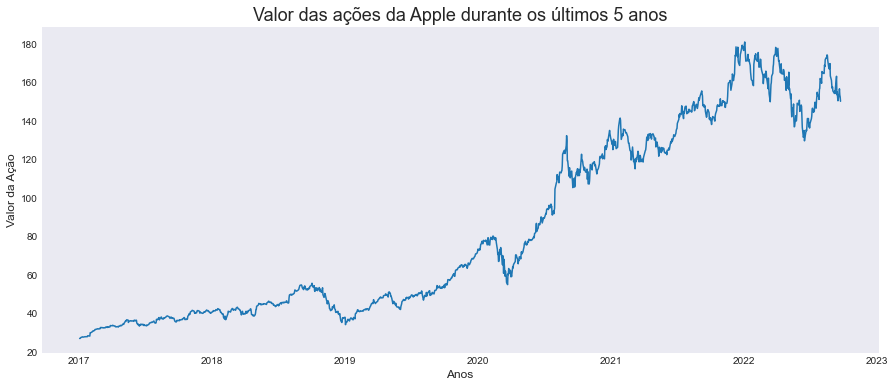

In [10]:
#GRAFICO PARA APPLE

#Criando o gráfico

plt.style.use('seaborn-dark')
plt.figure(figsize=(15,6))
plt.plot(dados.index, dados['AAPL'])
plt.title('Valor das ações da Apple durante os últimos 5 anos', fontsize=18)

#Editando as linhas e colunas

plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valor da Ação', fontsize=12);

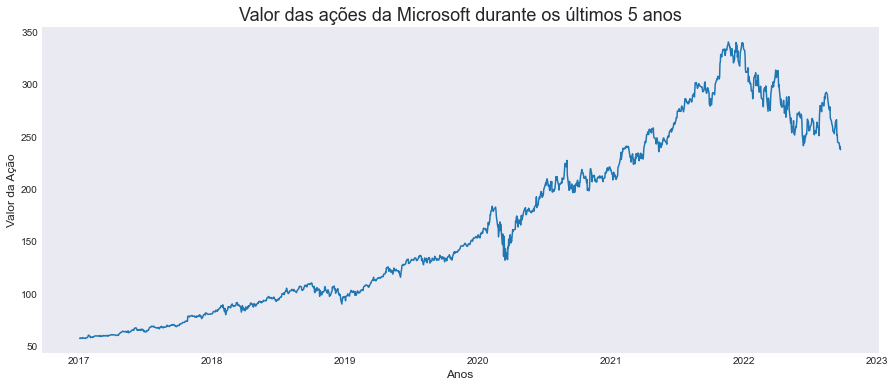

In [11]:
#GRAFICO PARA MICROSOFT

#Criando o gráfico

plt.style.use('seaborn-dark')
plt.figure(figsize=(15,6))
plt.plot(dados.index, dados['MSFT'])
plt.title('Valor das ações da Microsoft durante os últimos 5 anos', fontsize= 18)

#Editando as linhas e colunas

plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valor da Ação', fontsize=12);

## Medindo o retorno logaritimico da ações

-Usando a fórmula do retorno logaritimico de um ativo, conseguiremos entender melhor o comportamento de cada ação ao longo de um período de tempo.

In [12]:
retorno_log_dados = np.log(dados/dados.shift(1))
retorno_log_dados

,AAPL,MSFT
Date,,
2017-01-03,NaN,NaN
2017-01-04,-0.001120,-0.004484
2017-01-05,0.005072,0.000000
2017-01-06,0.011086,0.008630
2017-01-09,0.009118,-0.003188
...,...,...
2022-09-19,0.024774,-0.000899
2022-09-20,0.015544,-0.008502
2022-09-21,-0.020476,-0.014541


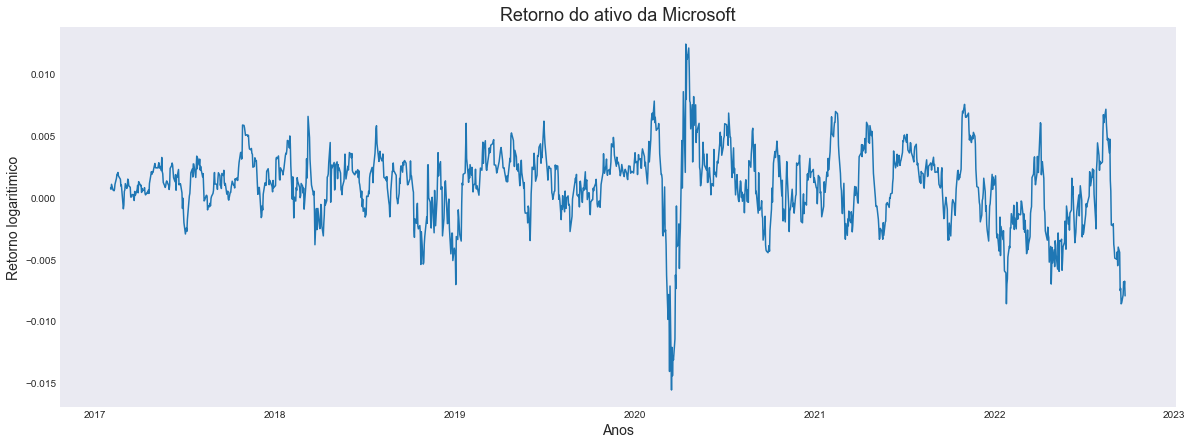

In [13]:
##GRAFICO DO RETORNO PARA O ATIVO DA MICROSOFT USANDO UMA MÉDIA MÓVEL DE 20 DIAS.

#Criando a média-móvel

media_movel_msft = retorno_log_dados['MSFT'].rolling(20).mean()

#Criando o gráfico

plt.style.use('seaborn-dark')
plt.figure(figsize=(20,7))
plt.plot(retorno_log_dados.index, media_movel_msft)
plt.title('Retorno do ativo da Microsoft', fontsize= 18)

#Editando as linhas e colunas

plt.xlabel('Anos', fontsize=14)
plt.ylabel('Retorno logaritimico', fontsize=14);

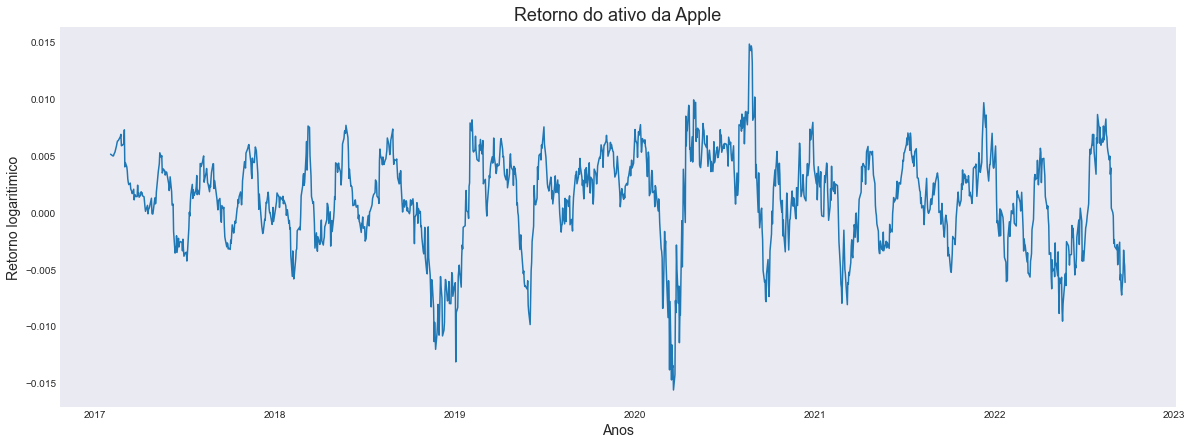

In [14]:
#GRAFICO DO RETORNO PARA O ATIVO DA APPLE USANDO UMA MÉDIA MÓVEL DE 20 DIAS.

#Criando a média-móvel

media_movel_aapl = retorno_log_dados['AAPL'].rolling(20).mean()

#Criando o gráfico

plt.style.use('seaborn-dark')
plt.figure(figsize=(20,7))
plt.plot(retorno_log_dados.index, media_movel_aapl)
plt.title('Retorno do ativo da Apple', fontsize= 18)

#Editando as linhas e colunas

plt.xlabel('Anos', fontsize=14)
plt.ylabel('Retorno logaritimico', fontsize=14);

##  Um pouco de estatística sobre o retorno do ativo da Apple.

In [16]:
#Média do retono logaritimico diario das ações da apple

appl_ret_diario = retorno_log_dados['AAPL'].mean()
appl_ret_diario

0.0011863649793688764

In [17]:
#Média anual, contando os dias em que a bolsa opera
appl_ret_anual = retorno_log_dados['AAPL'].mean()*250
appl_ret_anual

0.2965912448422191

In [18]:
#Desvio-padrão diário
appl_desv_diario = retorno_log_dados['AAPL'].std()
appl_desv_diario

0.01949610353820946

In [19]:
#Desvio-padrão anual
appl_desv_anual = retorno_log_dados['AAPL'].std() *250 **0.5
appl_desv_anual

0.30826046339604735

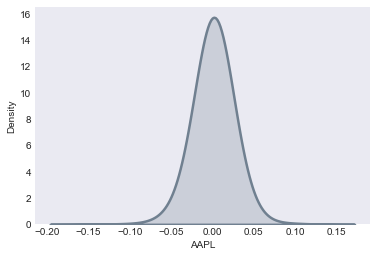

In [31]:
#Gráfico de distribuição.

sns.kdeplot(retorno_log_dados['AAPL'], shade = True, bw = 1 ,color ='#708090', linewidth = 2.5);

##  Um pouco de estatística sobre o retorno do ativo da Microsoft

In [20]:
#Média do retono logaritimico diario das ações da microsoft

micro_ret_diario = retorno_log_dados['MSFT'].mean()
micro_ret_diario

0.0009818253250188128

In [21]:
#Média anual

micro_ret_anual = retorno_log_dados['MSFT'].mean() * 250
micro_ret_anual

0.2454563312547032

In [22]:
#Desvio-padrão

micro_ret_diario = retorno_log_dados['MSFT'].std()
micro_ret_diario

0.017888306880608246

In [23]:
#Desvio-padrão anual

micro_ret_anual = retorno_log_dados['MSFT'].std() * 250**0.5
micro_ret_anual

0.2828389661339188

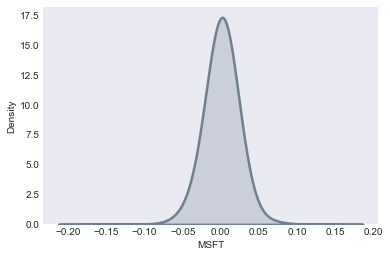

In [32]:
#Gráfico de distribuição.

sns.kdeplot(retorno_log_dados['MSFT'], shade = True, bw = 1 ,color ='#708090', linewidth = 2.5);

# - Considerações finais 

Olhando em valores brutos, as ações da microsft conseguem se sobrepor as da Apple. Porém, quando falamos de investimentos e de uma carteira de ações (portfólio), devemos medir o retorno médio do ativo e seu desvio padrão.
O retorno médio do ativo, nos mostrará em um determinado periodo de tempo(passado), o quando a ação valorizou ou desvalorizou. Já, o desvio padrão do retorno do ativo, ajuda a determinar a volatilidade do ativo. Quanto maior o despio-padrão, maior o risco de um investimento. Portanto, ao olharmos a média de retorno atual da Apple(~29,79%),vemos que ela foi maior que a da Microsoft(~25,12%). Contudo, o desvio-padrão médio do retorno foi de ~30,8% para Apple, enquanto o da Microsoft foi de ~28,3%.
Concluímos então, que as duas ações são ótimas escolhas para se incluir na sua carteira, enquanto a Microsoft é mais segura, a Apple e mais rentável, porém mais volátil.